In [12]:
import pandas as pd #for building dataframes from CSV files
import glob, os #for reading file names
import seaborn as sns #for fancy charts
import numpy as np #for np.nan
from scipy import stats #for statistical analysis
from scipy.stats import norm #for statistical analysis
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
orig_df = pd.read_csv('data/my-beer-data.csv')

In [3]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 35 columns):
beer.auth_rating                  218 non-null float64
beer.beer_abv                     218 non-null float64
beer.beer_description             147 non-null object
beer.beer_ibu                     218 non-null int64
beer.beer_label                   218 non-null object
beer.beer_name                    218 non-null object
beer.beer_slug                    218 non-null object
beer.beer_style                   218 non-null object
beer.bid                          218 non-null int64
beer.created_at                   218 non-null object
beer.rating_count                 218 non-null int64
beer.rating_score                 218 non-null float64
beer.wish_list                    218 non-null bool
brewery.brewery_active            218 non-null int64
brewery.brewery_id                218 non-null int64
brewery.brewery_label             218 non-null object
brewery.brewery_name              2

In [4]:
#checking col count of inital data
len(orig_df.columns)

35

In [5]:
#Looks like all null objects should be empty strings, given their column names
orig_df.fillna('', inplace=True)

In [6]:
#Check for duplicates
orig_df.drop_duplicates(inplace=True)

In [7]:
#Confirm no duplicates
orig_df[orig_df.groupby('beer.bid').count() > 1]['beer.bid'].count()

0

In [8]:
orig_df.describe()

,beer.auth_rating,beer.beer_abv,beer.beer_ibu,beer.bid,beer.rating_count,beer.rating_score,brewery.brewery_active,brewery.brewery_id,brewery.location.lat,brewery.location.lng,count,first_checkin_id,rating_score,recent_checkin_id,recent_created_at_timezone
count,218.000000,218.000000,218.000000,2.180000e+02,218.000000,218.000000,218.0,218.000000,218.000000,218.000000,218.000000,2.180000e+02,218.000000,2.180000e+02,218.000000
mean,2.827982,5.709862,25.091743,4.396526e+05,29561.408257,3.406275,1.0,36800.454128,17.997478,0.750046,1.018349,3.671075e+08,2.827982,3.680922e+08,1.307339
std,1.391298,1.851370,71.767102,5.669046e+05,62535.369065,0.459411,0.0,70220.710384,32.111875,99.968960,0.134517,5.066933e+07,1.391298,5.081204e+07,6.661814
min,0.000000,0.000000,0.000000,1.540000e+02,2.000000,0.000000,1.0,17.000000,-53.155200,-156.437000,1.000000,2.943933e+08,0.000000,2.943933e+08,-8.000000
25%,2.500000,5.000000,0.000000,1.334700e+04,692.250000,3.146250,1.0,1213.750000,0.000000,-87.721800,1.000000,3.185880e+08,2.500000,3.186549e+08,-4.000000
50%,3.250000,5.300000,0.000000,7.855000e+04,3832.500000,3.505500,1.0,4640.000000,33.145100,0.000000,1.000000,3.681367e+08,3.250000,3.681368e+08,2.000000
75%,3.750000,6.075000,38.750000,8.308302e+05,21456.000000,3.710750,1.0,27118.000000,41.517475,105.907500,1.000000,4.174442e+08,3.750000,4.202497e+08,8.000000
max,5.000000,16.900000,1000.000000,1.932539e+06,343218.000000,4.560000,1.0,299073.000000,58.356800,174.780000,2.000000,4.493459e+08,5.000000,4.493459e+08,12.000000


In [9]:
#beer.auth_rating is the user's unique checkin rating
orig_df[['beer.auth_rating', 'beer.rating_score', 'rating_score']].head()

,beer.auth_rating,beer.rating_score,rating_score
0,4.00,3.818,4.00
1,3.75,3.828,3.75
2,3.50,3.660,3.50
3,3.25,3.458,3.25
4,3.50,3.775,3.50


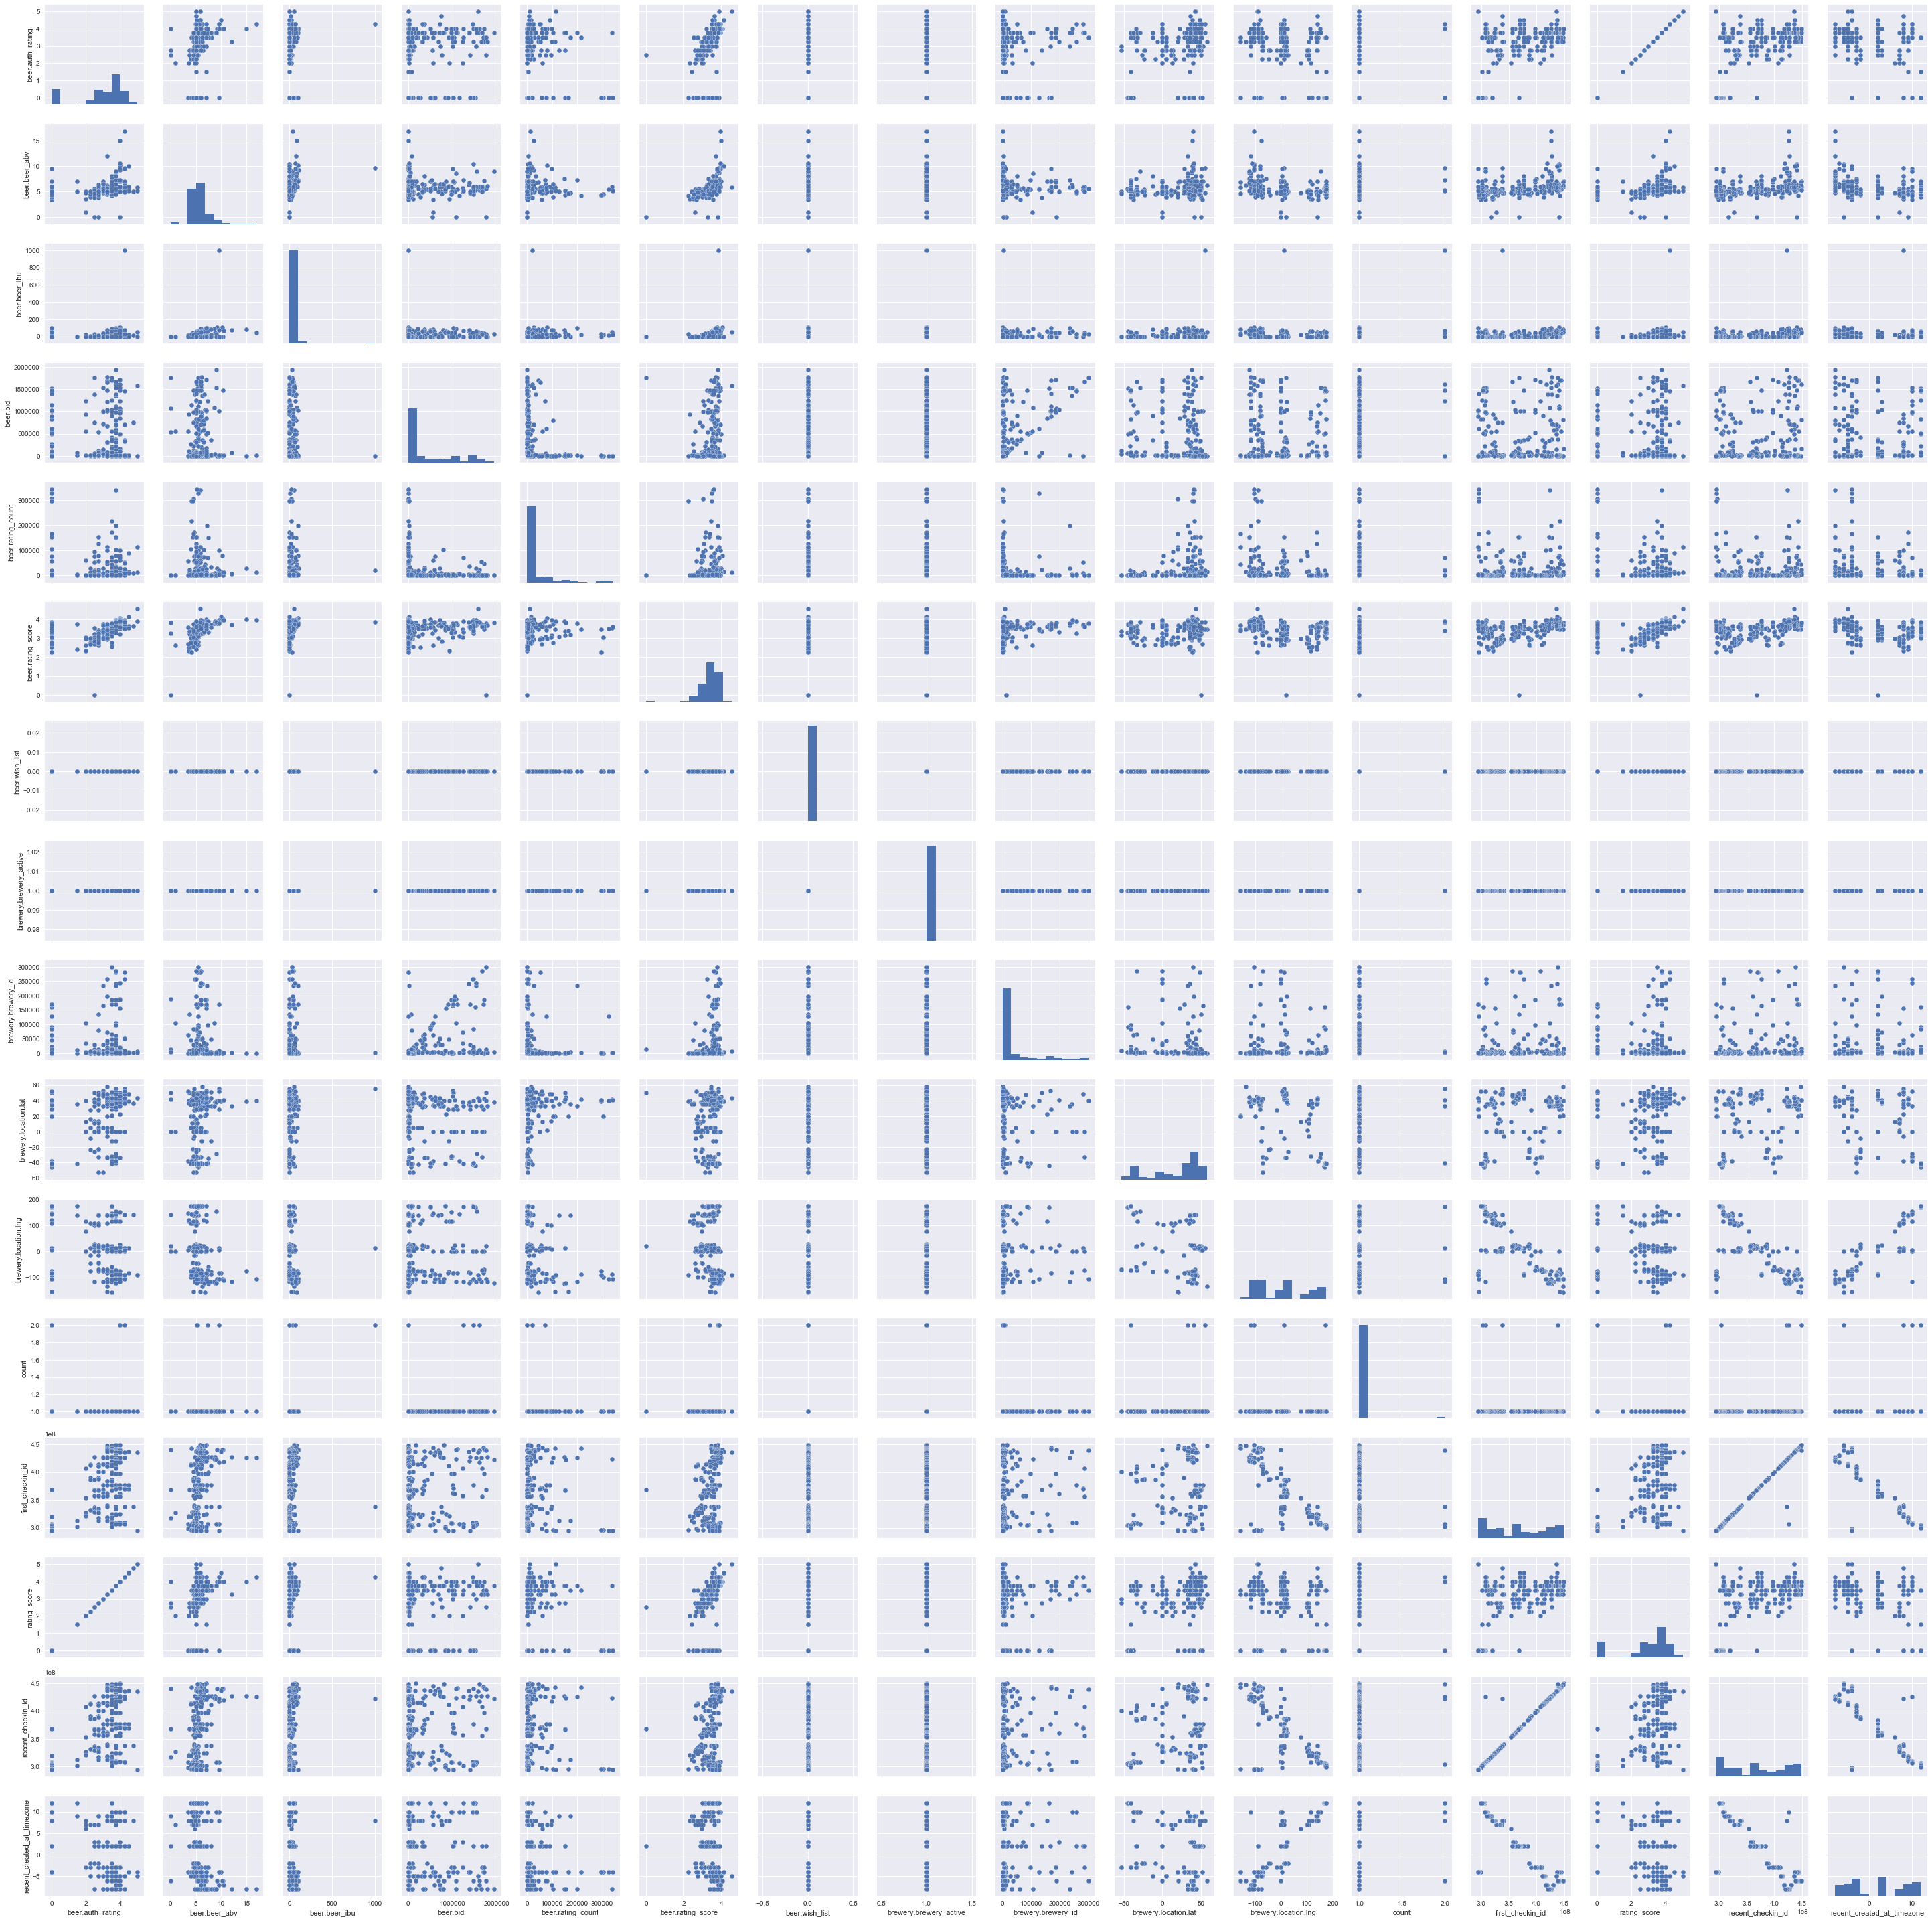

In [33]:
sns.pairplot(orig_df)

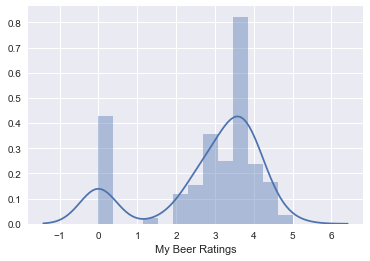

In [10]:
sns.distplot(orig_df['beer.auth_rating'], axlabel='My Beer Ratings')

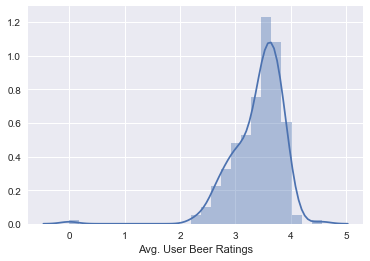

In [11]:
sns.distplot(orig_df['beer.rating_score'], axlabel='Avg. User Beer Ratings')

In [14]:
#filter if the user forgot to make a rating on the beer
final_df = orig_df[orig_df['beer.auth_rating'] > 0.0]

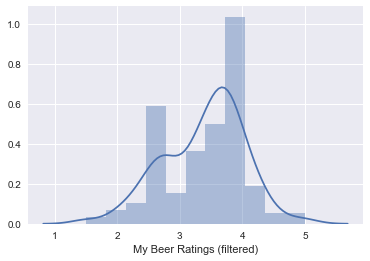

In [15]:
sns.distplot(final_df['beer.auth_rating'], axlabel='My Beer Ratings (filtered)')

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 217
Data columns (total 35 columns):
beer.auth_rating                  182 non-null float64
beer.beer_abv                     182 non-null float64
beer.beer_description             182 non-null object
beer.beer_ibu                     182 non-null int64
beer.beer_label                   182 non-null object
beer.beer_name                    182 non-null object
beer.beer_slug                    182 non-null object
beer.beer_style                   182 non-null object
beer.bid                          182 non-null int64
beer.created_at                   182 non-null object
beer.rating_count                 182 non-null int64
beer.rating_score                 182 non-null float64
beer.wish_list                    182 non-null bool
brewery.brewery_active            182 non-null int64
brewery.brewery_id                182 non-null int64
brewery.brewery_label             182 non-null object
brewery.brewery_name              1

In [56]:
#checking col count of inital data
len(final_df.columns)

35

In [49]:
#Save dataframe to CSV file for analysis
final_df.to_csv('final-user-beer-data.csv', index=False)

In [18]:
final_df['beer.auth_rating'].count()

182

In [19]:
final_df['beer.rating_score'].count()

182

In [ ]:
#One sample test - likely not applicable here
stats.ttest_1samp(final_df['beer.auth_rating'], final_df['beer.rating_score'])

In [20]:
#Use of a two sample t test to test if the mean ratings are the same (between me and the avg user)
stats.ttest_ind(final_df['beer.auth_rating'], final_df['beer.rating_score'])

Ttest_indResult(statistic=-0.55023730301582718, pvalue=0.58249597070620007)

In [22]:
final_df['beer.auth_rating'].describe()

count    182.000000
mean       3.387363
std        0.644530
min        1.500000
25%        2.812500
50%        3.500000
75%        3.750000
max        5.000000
Name: beer.auth_rating, dtype: float64

In [23]:
final_df['beer.rating_score'].describe()

count    182.000000
mean       3.419945
std        0.471967
min        0.000000
25%        3.146250
50%        3.532500
75%        3.726750
max        4.560000
Name: beer.rating_score, dtype: float64

In [57]:
beer_diff = final_df.groupby(['beer.beer_style'], as_index=False)[('beer.auth_rating', 'beer.rating_score')].mean()

In [60]:
beer_diff['diff'] = beer_diff['beer.auth_rating'] - beer_diff['beer.rating_score']

In [78]:
top_diff = beer_diff.sort_values(by='diff', ascending=False).head(20)

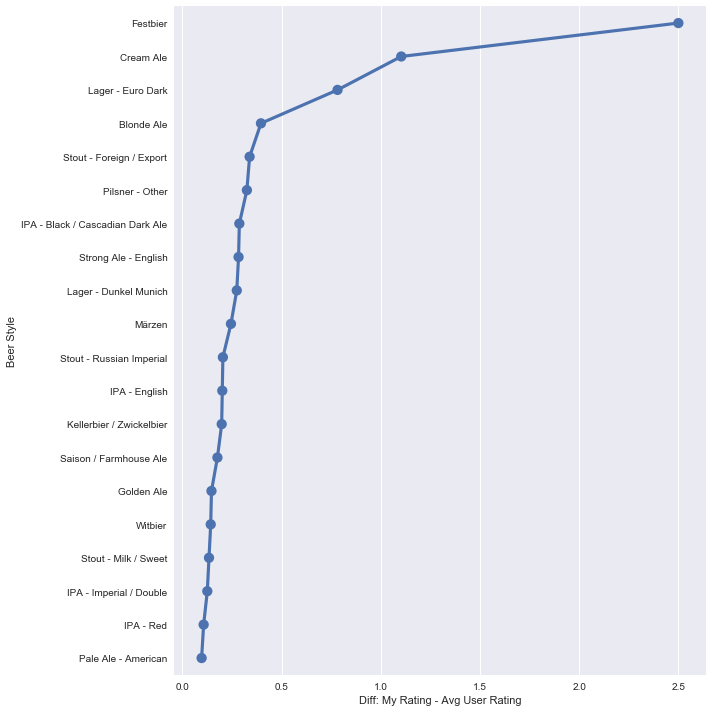

In [84]:
t = sns.factorplot(x='diff', y='beer.beer_style', data=top_diff, size=10)
t.set_axis_labels('Diff: My Rating - Avg User Rating','Beer Style')

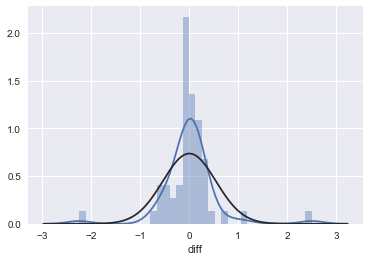

In [89]:
sns.distplot(beer_diff['diff'], fit=norm)

In [91]:
#stats.ttest_1samp(beer_diff['diff'])

In [87]:
bottom_diff = beer_diff.sort_values(by='diff', ascending=True).head(20)

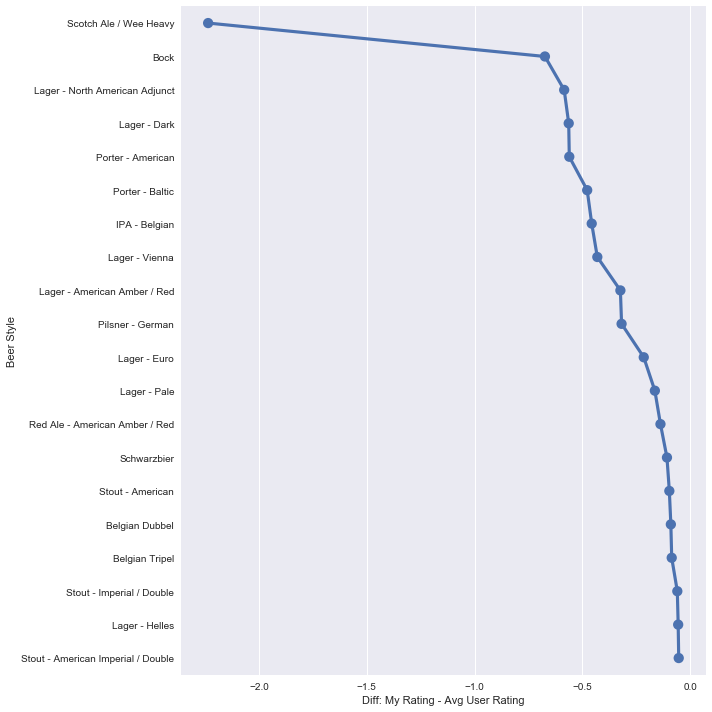

In [88]:
b = sns.factorplot(x='diff', y='beer.beer_style', data=bottom_diff, size=10)
b.set_axis_labels('Diff: My Rating - Avg User Rating','Beer Style')

In [120]:
df_style = final_df.groupby(['beer.beer_style'], as_index=False)[('beer.auth_rating')].count()

In [126]:
df_style.sort_values(by='beer.auth_rating', ascending=False).head(10)

,beer.beer_style,beer.auth_rating
30,Lager - Pale,26
15,IPA - American,25
33,Pale Ale - American,20
29,Lager - North American Adjunct,7
32,Märzen,6
41,Red Ale - American Amber / Red,6
24,Lager - Dunkel Munich,5
14,Hefeweizen,5
19,IPA - Imperial / Double,4
9,Dunkelweizen,4


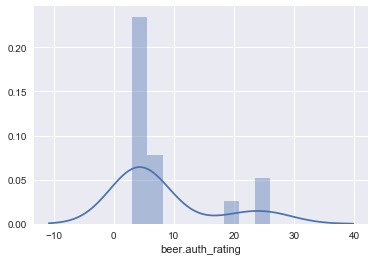

In [124]:
sns.distplot(df_style_plot['beer.auth_rating'])